In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from helper_functions.grape_functions import *
from main_grape.Grape import Grape
from main_grape.Evolve import Evolve
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:

#Defining time scales
total_time = 10.0
steps = 300

#Defining H0
qubit_state_num = 2

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)

H0 = Q_z 
       

#Defining Forbidden sates

#states_forbidden_list = [3]

#Defining Concerned states (starting states)
psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['0','1']

#Defining U (Target)

U = np.reshape(Hadamard(1),[2,2])


#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z
Hops = [XI]
ops_max_amp = [4.0]
Hnames =['x']

#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-10,'learning_rate_decay':decay}
penalty_coeffs = {'envelope' : 0, 'dc':0, 'dwdt':0,'d2wdt2':0, 'forbidden':0}

    #Defining initial pulses
u0 = []
u0.append(np.ones(steps))




In [3]:
print np.kron(Q_x,U0)

[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]]


L-BFGS-B optimization done


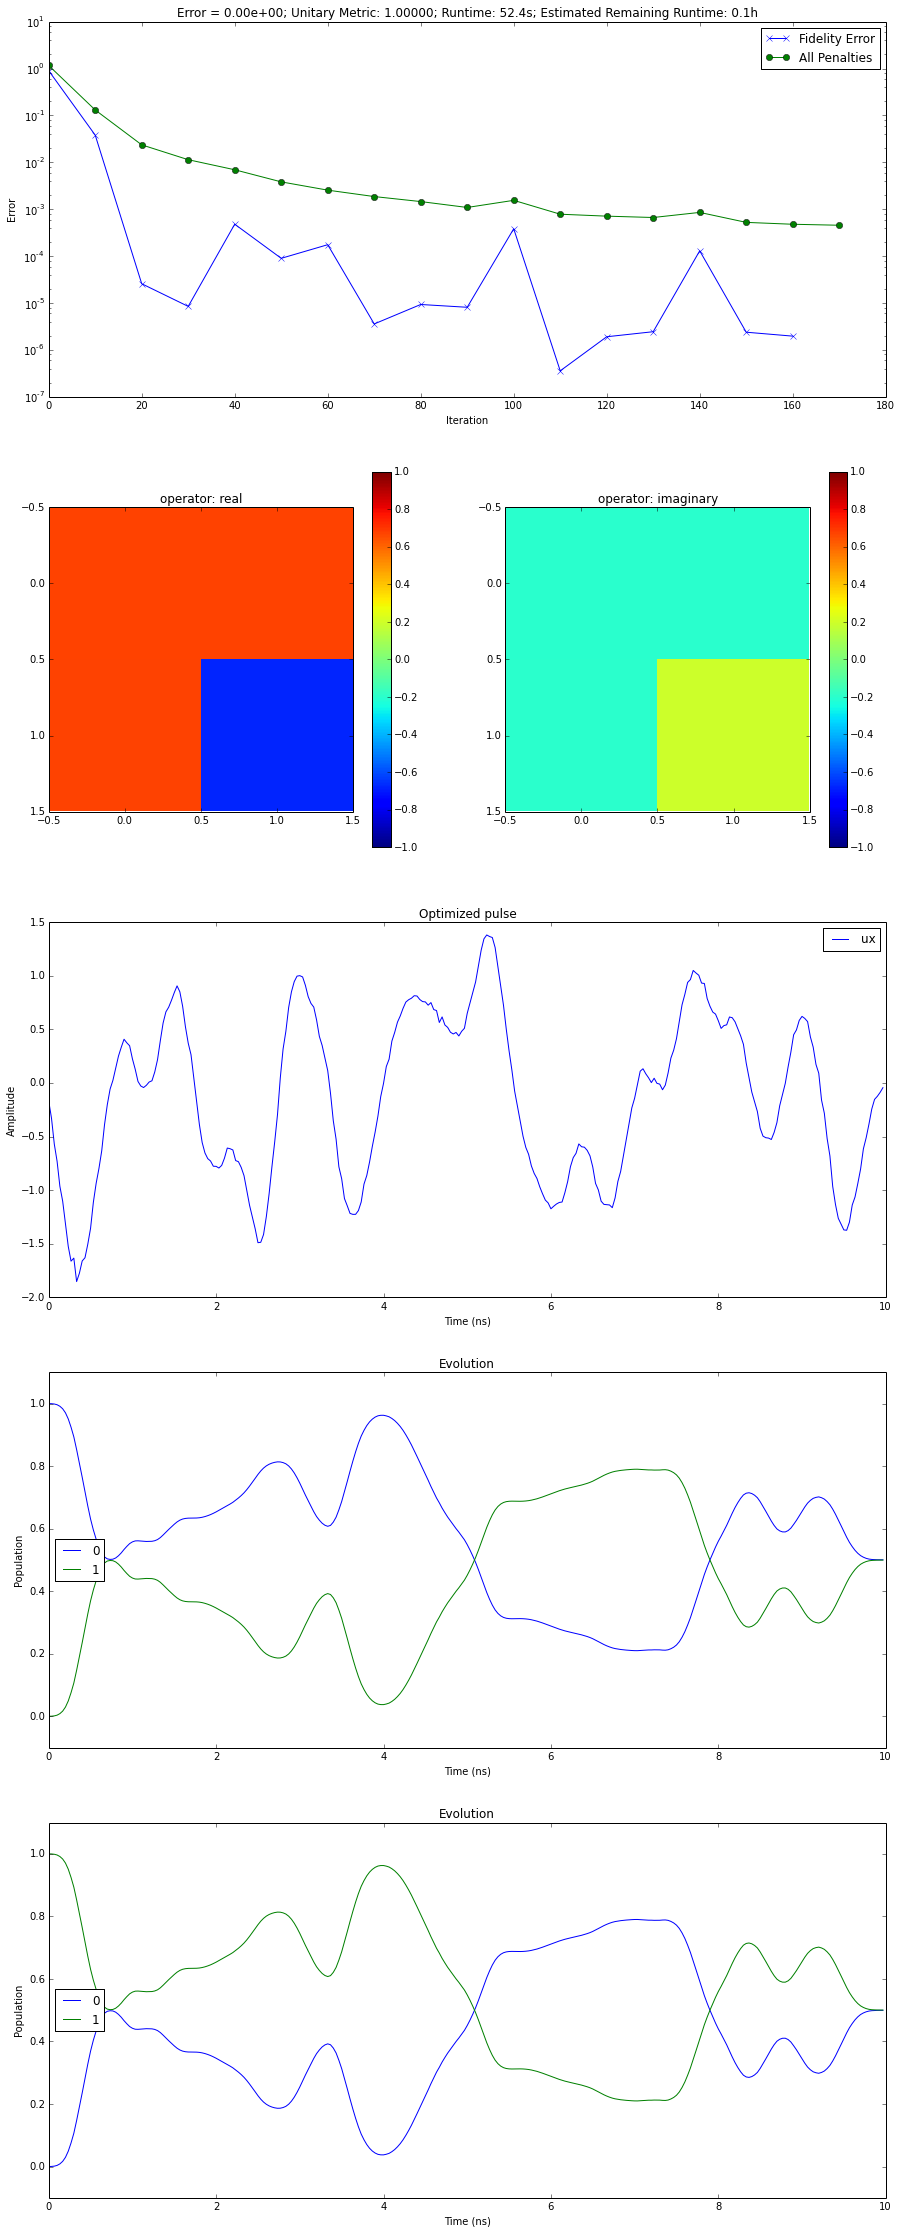

In [4]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,U_f = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence,method = 'L-BFGS-B', 
                switch = False, draw = [states_draw_list,states_draw_names])

Error = 0.000000238


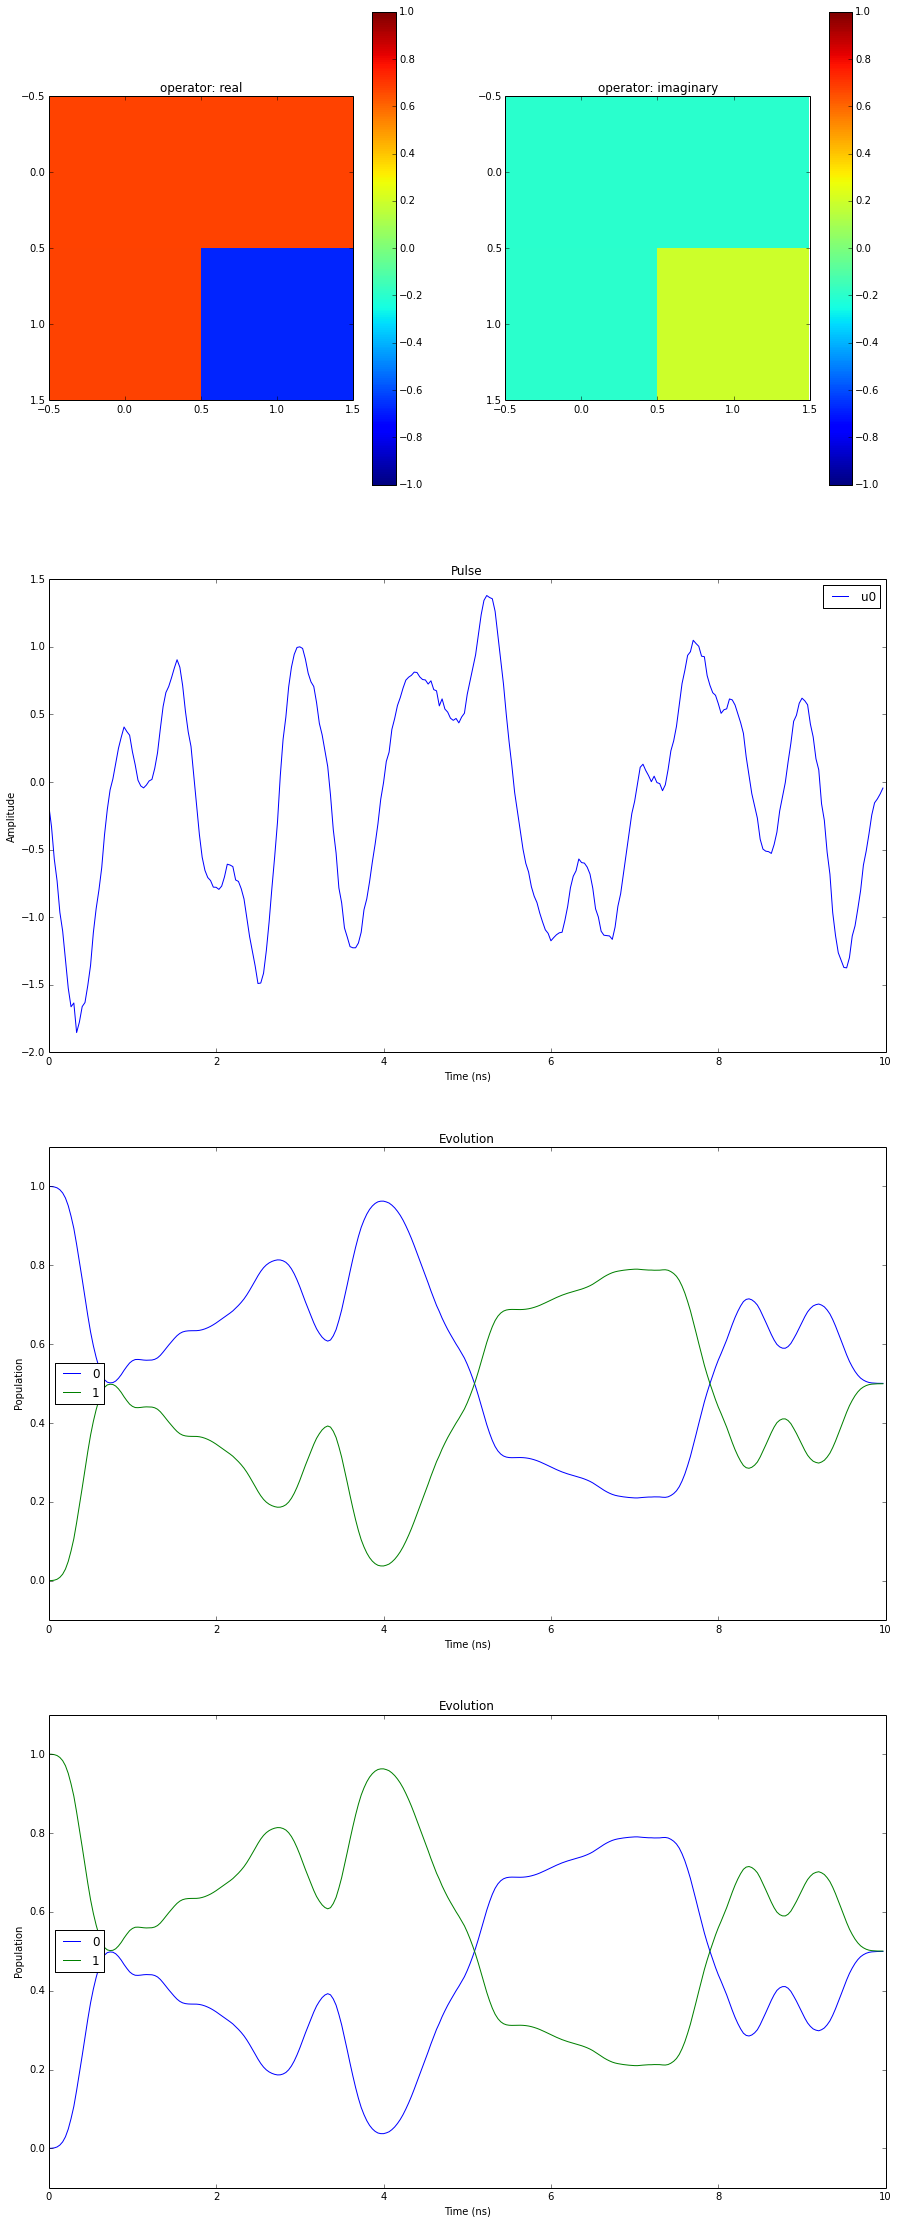

In [5]:

Evolve(H0,Hops,total_time,steps,psi0, uks, draw = [states_draw_list,states_draw_names], U = U)